In [25]:
import pandas as pd
import numpy as np
import os

In [26]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [27]:
# getting the dataset
train_df = pd.read_csv(train_file_path,index_col='PassengerId')
test_df = pd.read_csv(test_file_path,index_col='PassengerId')
test_df['Survived']=-888

In [28]:
# merging them into one dataframe
df = pd.concat((train_df,test_df),axis=0)

# EDA-3
- Data Munging ( remove issues with dataset like missing values and working with outliers)
- Feature Engineering ( Derived Features and Categorical Feature Encoding)
- Advanced Visualization


1- DATA MUNGING
    - missing values
    - Extreme values( outliers)
    - Erroneous values ( we will not focus on this here)
    
#1.a) Missing Value 
    Issue -
    - inaccurate analysis
    Soln
    - deletion (if few missing values are there)
    - Imputation : replace missing value with some plausible value
    
    -> Imputation techniques
    i) Mean Imputation : replace missing value by mean
        - but mean can be affected by extreme value
    ii) Median Imputation
        - same but median
        - for safe side use median
    iii) Mode Imputation
        - if categorical data is there
        - ie highest frequency class will be given to missing places
     iv) Forward/Backward Fill
         - for time series or Sequential data
         - Frwd fill : if ith postn is missing, fill it with i-1th positn value
         - Bkwrd Fill : if ith postn is missing, fill it with i+1th positn value
     v) Predictive Model
         - some model can predict the missing values

In [29]:
# use .info() to detect the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature : Embarked

In [30]:
# extract rows with Embarked as null
df.loc[((df.Embarked.isnull())),:] # this is one way

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [31]:
# other way 
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [33]:
# how many people embarked at different points
df.Embarked.value_counts()
# S is the highest number, so we can replace by S ie. South Hampton

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
# we will check which embarkment point has most number of survivers
pd.crosstab(df[df.Survived!= -888].Survived , df[df.Survived!= -888].Embarked)
# by this we get to know that South Hamptop has more number of survivers

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [37]:
# impute the missing values with 'S'
# 1. df.loc[df.Embarked.isnull(),'Embarked'] = 'S'
# 2. df.Embarked.fillna('S',inplace=True)
# Inplace true will modify the same dataframe, False will create a copy and replace

In [38]:
# option 2 : explore the fare of each class for each embarkment point
# Note : In data for the two missing embarkment, fare is 80 so will researh a bit
df.groupby(['Pclass','Embarked']).Fare.median().unstack()
# or 
# df.pivot_table(index='Pclass',columns='Embarked',values='Fare',aggfunc='median')

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [39]:
# .'. Its C instead of S
df.loc[df.Embarked.isnull()].Embarked = 'C'
# this method gives error as we need to give column inside

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
# df.loc[df.Embarked.isnull(),'Embarked'] = 'C
# this will work but we will use
df.Embarked.fillna('C',inplace=True)

In [41]:
# check if any null value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [42]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
# Now we have to fix age,cabin and fare 

## Feature: Fare

In [43]:
df[df.Fare.isnull()]
# here we can use a median fare of passengers of Pclass=3 , Embarked='S'

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [46]:
median_fare = df.loc[(df.Pclass ==3) & (df.Embarked == 'S')].Fare.median()
print(median_fare)

8.05


In [47]:
df.Fare.fillna(median_fare,inplace=True)

In [51]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature: Age

In [52]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 5

In [55]:
# return null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
...,...,...,...,...,...,...,...,...,...,...,...
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


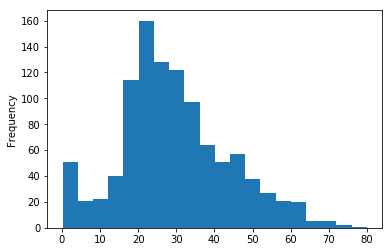

In [54]:
# we can replace the age by mean age, but lets explore using histogram
%matplotlib inline
df.Age.plot(kind='hist',bins=20);

#### NOTE: Distributions like univariate and bivariate can be used for all numerical/categorical data
-. # exmaple : df.plot.scatter(x='Pclass',y='Fare',color='c',title='scatter plot : Age vs Fare')


In [57]:
# lets check mean age
df.Age.mean()
# as we see some high values like 80 and 70 are there which are driving the mean, so we will take
# some other path
# --for trying --
#df.plot.scatter(x='Pclass',y='Fare',color='c',title='scatter plot : Age vs Fare')

29.881137667304014

##### option 2 : replcae with meadian age of gender

In [58]:
# its normal that diff gender will have different mean
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

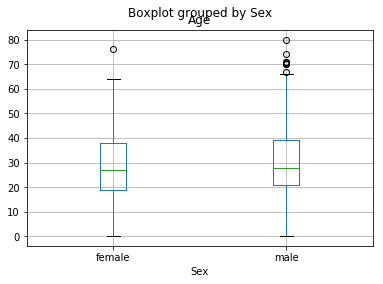

In [27]:
# as we see median age is almost similar
# lets see distribution of age for male and female using box-whisker 
df[df.Age.notnull()].boxplot('Age','Sex')
# this is grouping by 
# here we see that both male and female have similar dist wrt age so gender is not a gud choice

Note : If we had to replace the age by median of age of male and female
-. age_sex_median = df.groupby('Sex').Age.transform('median')
    -. df.Age.fillna(age_sex_median, inplace=True)   

In [61]:
#---------------- Just for Trying -----------------
age_sex_median = df.groupby('Sex').Age.transform('median')
# this will give us a series of output age based on gender median
print(age_sex_median)

PassengerId
1       28.0
2       27.0
        ... 
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64


In [63]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
...,...,...,...,...,...,...,...,...,...,...,...
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


#we wont replace now, we will see through other options to replace
### option 3 : replace with median of Pclass

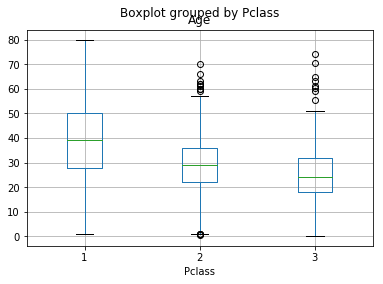

In [30]:
#df[df.Age.notnull()].boxplot('Age','Pclass')
df[df.Age.notnull()].boxplot('Age','Pclass')
# here diff is there for dist in diff Passenger class but we will explore more
# here also we can use transform and fillna to put the values

### option 4 : replace with median age of title


In [31]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
                              ...                        
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [65]:
# function to get the title info from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title 

In [66]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [34]:
# we will modify the getTitle function
# this will give custom title from dict
def GetTitle(name):
    title_group = {'mr':'Mr',
                   'mrs':'Mrs',
                   'miss':'Miss',
                   'master':'Master',
                   'don':'Sir',
                   'rev':'Sir',
                   'dr':'Officer',
                   'mme':'Mrs',
                   'ms':'Mrs',
                   'major':'Officer',
                   'lady':'Lady',
                   'sir':'Sir',
                   'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'
                  }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [67]:
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [68]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr


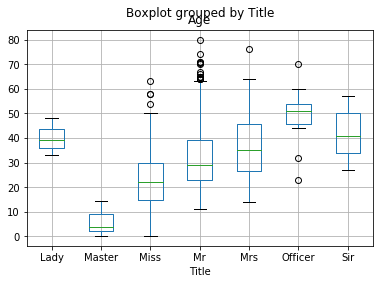

In [37]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title')
# As expected median age for master title is lower than others,
# Miss has lower age than Lady or Mrs

In [71]:
# replace the missing values
title_age_median = df.groupby('Title').Age.transform('median')
print(title_age_median)

PassengerId
1       29.0
2       35.5
        ... 
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64


In [72]:
# fill 
df.Age.fillna(title_age_median,inplace=True)

In [73]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


## Outlier
** different behavior than normal**

possible through
    - data entry 
    - data processing
    - naturally
Issue : 
    - Biased analysis, as mean,range, variance and std deviance can be impacted by extreme values
    - Biased Models
      
Outlier detection:
    - histogram ( for one variable )
    - boxplot for univariate outlier detection ie. dots beyond whiskers or beyond 1.5*IQR
    - Scatter for bivariate, outlier will be outside of the crowd
    
Treatment:
    - removal
    - transformation : ex. take log or sqrt 
    - binning : create bins, .'. outliers in seperate bin
    - Imputation : ie. replace or impute with more reasonable values

### Working with Outliers

#### Age

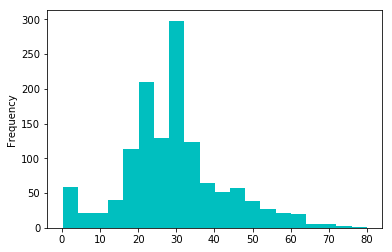

In [81]:
# use hist to understant the distribution
df.Age.plot(kind='hist',bins=20,color='c')
# most age values 20's and 30's, few in 70's and 80's

In [75]:
# we will explore those rows where age >70
pd.options.display.max_rows = 10
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,mrs


##### lets explore one more attribute
### Fare

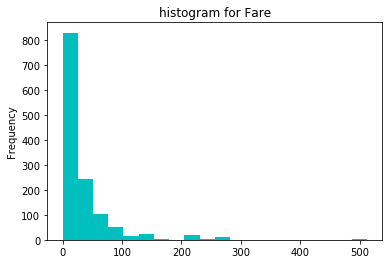

In [76]:
# histogram for fare
df.Fare.plot(kind='hist',title='histogram for Fare',bins=20,color='c')

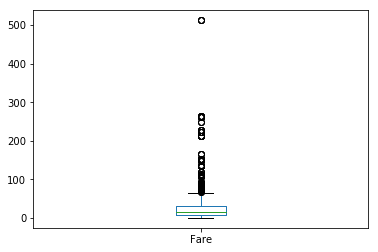

In [77]:
df.Fare.plot(kind='box')

In [82]:
# lets look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,mrs


In [83]:
# we know that distribution of Fare is very skewed, so we can apply
# some kind of transformation to make it less skewed
# Since Fare is not -ve we can apply log transformation
LogFare=np.log(df.Fare + 1.0)
# we are adding 1 to accomodate 0 as log(0) is undefined

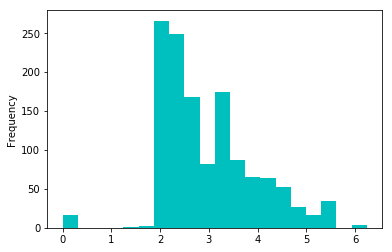

In [84]:
LogFare.plot(kind='hist',color='c',bins=20);
# this is less skewed dist

In [2]:
# binning : imp technique for outlier treatment 
# in pandas we can use .cut or .qcut for binning
# q cut does quantile based binning
pd.qcut(df.Fare, 4) # 4 is num of bins ie. split Fare in 4 bins
# each bin will contain almost equal number of observations

NameError: name 'pd' is not defined

In [49]:
# we can also give names to the bins 
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])
# thus we are converting numerical feature into categorical feature
    # where each bin is a category
# this is called DISCRETIZATION technique

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [high < low < very_high < very_low]

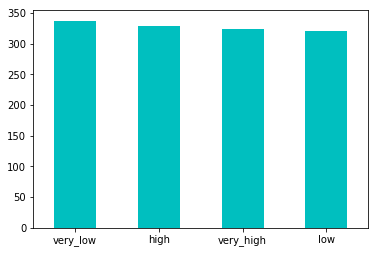

In [50]:
# as this is like category, we can apply value_counts
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0,color='c');
# we can see that we have similar number of observations in each bin

In [51]:
# save these as a new feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

### Feature : Age State ( Adult or Child 
- Process of transforming raw data to better representative features in order to create better predictive models
    1.Transformation : can be simple like taking logs or use sophistaced algo
    2. Create better features
    3. Feature Selection 

In [52]:
# NOte : we hade already created Title Feature using Name Feature
    # and Fare attribute to create Fare_Bin feature

# AgeState based on Age
# where requires three things
# 1. actual comparison
# if true return 'Adult' else return 'Child'
df['AgeState'] = np.where(df['Age']>=18,'Adult','Child')

In [53]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [54]:
# cross tab survived and agestate
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].AgeState)
# survival rate is higher in childen

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


##### lets create some more features
###### Feature : FamilySize

In [55]:
# Family : Adding Parents with Siblings
# ie. if small family then all would have gone to lifeboat
# if big family then panic could be there

In [1]:
# Family : Adding the family feature
df['FamilySize'] = df.Parch+df.SibSp+1; # 1 for self

NameError: name 'df' is not defined

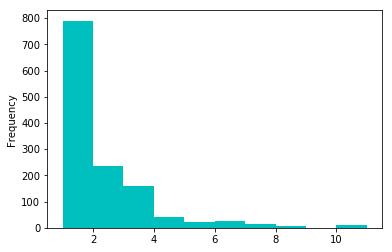

In [57]:
df.FamilySize.plot(kind='hist',color='c');
# extreme values are there which we will explore

In [58]:
# further explore this family with max family members
# df[df.FamilySize == df.FamilySize.max()]
# or if we want to extract only few columns
df.loc[df.FamilySize == df.FamilySize.max() , ['Name','Survived','FamilySize','Ticket']]
# we see that entire family didnt survive ( lets consider same for -888 value)

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
...,...,...,...,...
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [59]:
# crosstab to check relation of family size and Survived
pd.crosstab(df[df.Survived!=-888].FamilySize,df[df.Survived!=-888].Survived)
# for 2,3,4 we get to know if one got in life boat he took his family
# for large family size its poor

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [60]:
# lets check if motherhood had impact on the survival rate of not
# a lady aged more than 18 who has Parch > 0 and is married ( nor miss)
np.where(((df.Sex=='female')&(df.Parch>0) & (df.Age>18)& (df.Title!='Miss')),1,0)    

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
# check if 1 is present in array a 
1 in np.where(((df.Sex=='female')&(df.Parch>0) & (df.Age>18)& (df.Title!='Miss')),1,0)    

True

In [62]:
df['IsMother'] = np.where(((df.Sex=='female')&(df.Parch>0) & (df.Age>18)& (df.Title!='Miss')),1,0)    

In [63]:
# crosstab with survived
pd.crosstab(df[df.Survived!=-888].IsMother,df[df.Survived!=-888].Survived)
# result shows motherhood has some impact on survival

Survived,0,1
IsMother,,
0,533,303
1,16,39


** we will see if we can create some more feature**

##### Feature : Deck
- Deck can tell about passengers location in the ship
- it can also give hint towards the socioeconomic status of the passenger and availibility of the lifeboat


In [64]:
# explore cabin attribute
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [65]:
# use unique to get unique values for Cabin features
df.Cabin.unique()
# we have different cabins
# we have nan 
# one cabin is T


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [66]:
# lets lookup for Cabin=T
df.loc[df.Cabin == 'T']
# we see that one deck is there for only one passenger so it 
# would have been there by mistake


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [67]:
df.loc[df.Cabin =='T','Cabin'] = np.NaN

In [68]:
# look at the unique values of cabin
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'C128', 'D37', 'B35',
       'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70',
       'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50',
       'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [69]:
# extract the first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

In [70]:
# check if NaN wil give null or not
#str("jin")[0]
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [71]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [72]:
# crosstab survival info with deck
pd.crosstab(df[df.Survived != -888].Survived , df[df.Survived!= -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [73]:
# info
df.info

<bound method DataFrame.info of               Age Cabin Embarked      Fare  \
PassengerId                                  
1            22.0   NaN        S    7.2500   
2            38.0   C85        C   71.2833   
3            26.0   NaN        S    7.9250   
4            35.0  C123        S   53.1000   
5            35.0   NaN        S    8.0500   
...           ...   ...      ...       ...   
1305         29.0   NaN        S    8.0500   
1306         39.0  C105        C  108.9000   
1307         38.5   NaN        S    7.2500   
1308         29.0   NaN        S    8.0500   
1309          4.0   NaN        C   22.3583   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikk

## Categorical Feature Encoding
ie. Converting Categorical feature to numerical feature

-> Feature Encoding methods
1. Binary Encoding
 - If two a feature has two categories/classes
 - ex. Gender
2. Label Encoding
- ex. Passenger fare info, lets say three categories 
    - Low ----- 1
     Medium ----2
     High ------3 
    - here the categories are encoded in labels
    - prob : machine learning will consider the order in the fare and consider 3 greater than 1
    - here categories are order .'. its fine
    -if categories dont have an order then we can use one-hot Encoding
3. One-Hot Encoding
- ex. Embarked ( P Q S ) , no intrinsic order within the embarkment points
- here we create as many features as the number of categories


In [74]:
# Encode Gender attribute
df['IsMale'] = np.where(df.Sex == 'male',1,0)

In [75]:
# encode many features in one go using get_dummies
# note: Agestate is binary as it contains child or adult
# but get_dummies wont mind if we pass a binary feature
# we are assigning the output to df itself to override the content
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [76]:
print(df.info())
# now we have 39 columns
# we still have some columns not numerically encoded
# we used cabin to create deck so it can be removed
# Name is used to extract title .'. remove name
# ticket feature we will not explore now
# Parch and SibSp to create FamilySize 
# isMale using Sex attribute
# so we will remove and reorder the left out columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### drop and reorder columns

In [78]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace =True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [87]:
# reorder columns
# first we will create a list of columns using list comprehension and 
# iterating over all columns using df.columns
# we are skipping the survived column in loop 
columns = [column for column in df.columns if column != 'Survived']

In [88]:
# we will add survived column in the beginning
columns = ['Survived'] + columns
df = df[columns]
# we will assign df with reordered columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save Processed Dataset

In [92]:
# create path to save the processed file
processed_data_path = os.path.join(os.path.pardir,'project','titanic','data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [93]:
# writing df to file
# for train dataset Survived is not -888
df.loc[df.Survived!=-888].to_csv(write_train_path)
# test data
columns = [column for column in df.columns if column!= 'Survived']
df.loc[df.Survived == -888,columns].to_csv(write_test_path)
